<a href="https://colab.research.google.com/github/claudioldc/MBA/blob/main/Exercicio_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas

In [1]:
import pandas as pd # Trabalhar com as tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import numpy as np # funções matemáticas de alto nível

Coletando Dados dos Estados Brasileiros

In [2]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding='latin-1')

In [3]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


Coletando Dados Experiência Salarial

In [8]:
experiencia = pd.read_csv('Experience-Salary (1).csv', sep = ',', encoding='latin-1')

In [9]:
experiencia.head()

,client_ID,exp(in months),salary(in thousands)
0,1,18.290293,16.521825
1,2,17.023407,11.666234
2,3,26.343613,23.167255
3,4,19.105834,20.877145
4,5,27.742516,23.166236


Coletando Dados Pessoais

In [10]:
clientes = pd.read_excel('dados_pessoais.xlsx')

In [11]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


Preparação dos Dados



Analisando as Variáveis das Bases de Dados


In [12]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [13]:
experiencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_ID             1000 non-null   int64  
 1   exp(in months)        1000 non-null   float64
 2   salary(in thousands)  1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [14]:
experiencia.describe()

,client_ID,exp(in months),salary(in thousands)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,26.157825,26.722597
std,288.819436,8.717091,8.844761
min,1.000000,0.697594,-1.276342
25%,250.750000,20.073600,20.531008
50%,500.500000,25.875225,26.745576
75%,750.250000,32.406986,32.615753
max,1000.000000,49.463222,55.297016


In [35]:
experiencia.rename(columns={'client_ID': 'id_cliente'}, inplace=True)


In [36]:
experiencia.describe()

,id_cliente,exp(in months),salary(in thousands)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,26.157825,26.722597
std,288.819436,8.717091,8.844761
min,1.000000,0.697594,-1.276342
25%,250.750000,20.073600,20.531008
50%,500.500000,25.875225,26.745576
75%,750.250000,32.406986,32.615753
max,1000.000000,49.463222,55.297016


In [29]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        547 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [16]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


Analisando Dados Ausentes

In [17]:
#Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [18]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [19]:
experiencia.isna().sum()

client_ID               0
exp(in months)          0
salary(in thousands)    0
dtype: int64

Eliminando Dados Ausentes

In [ ]:
clientes.dropna(subset=['peso'], inplace=True) #para eliminar o registro

In [ ]:
clientes.isna().sum()

In [ ]:
clientes.count()

In [ ]:
clientes.describe()

In [20]:
#Realizando a Média e a Mediana da Variável Peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [21]:
#Verificando os Valores
print(f"o valor da media dos pesos é:{media}\no valor da mediana é:{mediana}")

o valor da media dos pesos é:143.4409594095941
o valor da mediana é:140.0


In [22]:
#Fazendo o arredondamento da variavel media
round(media,2)

143.44

In [23]:
#Preencher os valores ausentes pela media
clientes.peso.fillna(round(media,2), inplace=True)

In [24]:
#Verificar se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [25]:
clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

Substituindo Variável Categórica

In [26]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [27]:
estados.pais.fillna('Brasil', inplace=True)

In [28]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

Analisando a Distribuição de Dados

In [30]:
import matplotlib.pyplot as plt

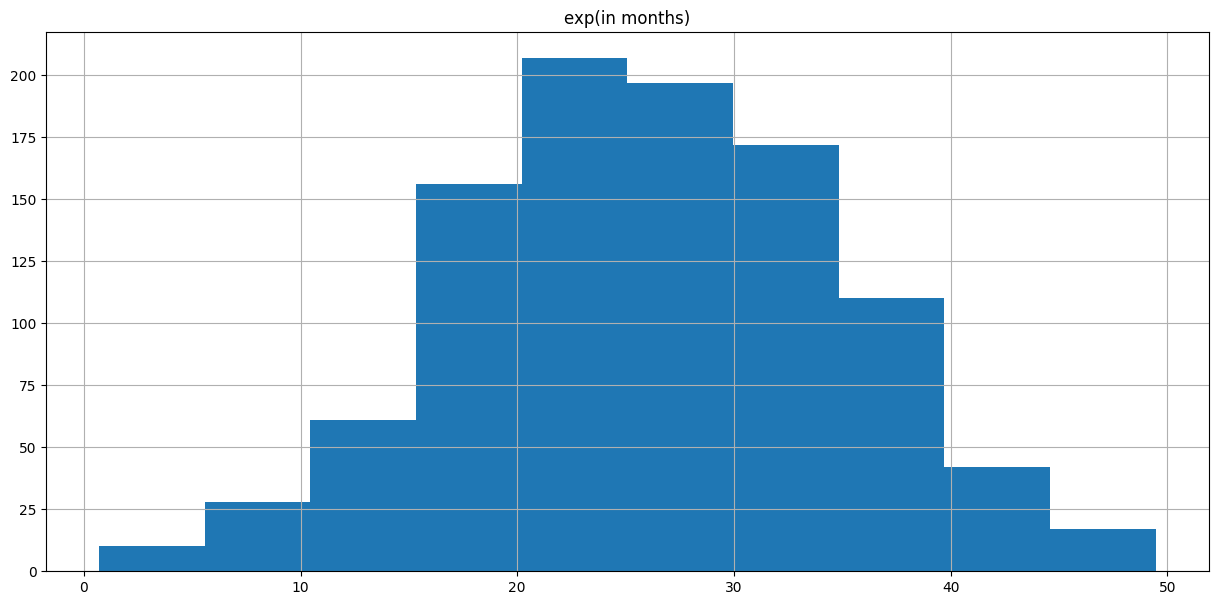

In [31]:
experiencia.hist(column='exp(in months)', figsize=(15,7))
plt.show()

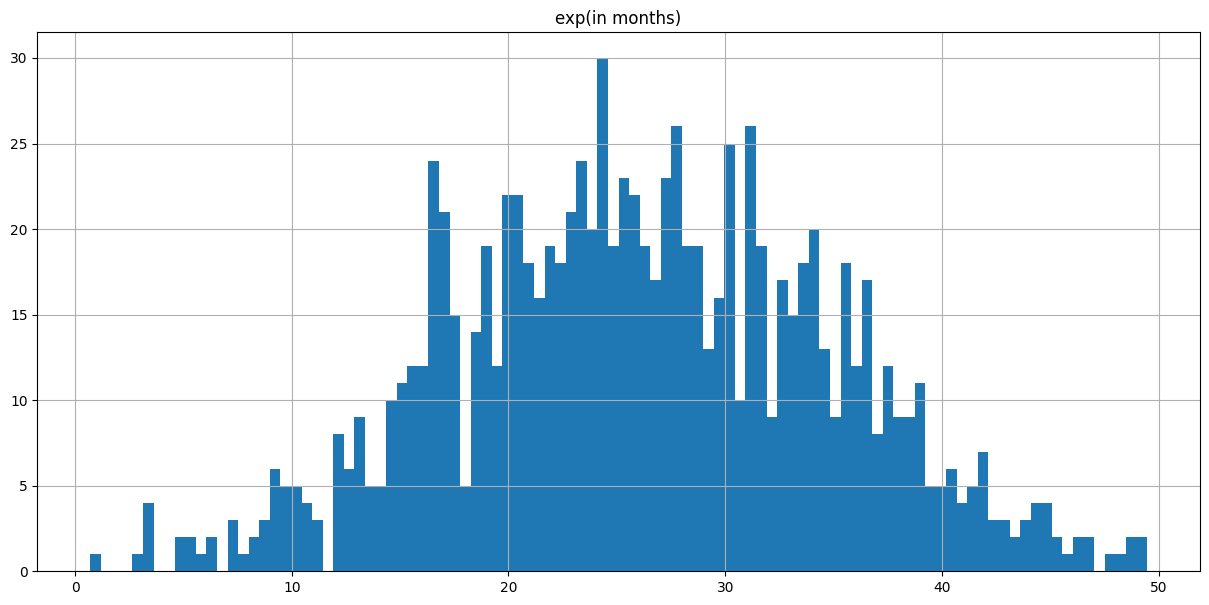

In [32]:
experiencia.hist(column='exp(in months)', figsize=(15,7), bins=100)
plt.show()

Junções Entre os Dados Coletados

In [ ]:
#Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [33]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [34]:
clientes_estados = pd.merge(clientes,estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,Amazonas,am,Brasil
65,4,140.0,167,Feminino,24,Santa Catarina,sc,Brasil
87,5,130.0,158,Masculino,26,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,Rondônia,ro,Brasil
478,544,129.0,157,Masculino,1,Acre,ac,Brasil
178,545,107.0,115,Masculino,6,Ceará,ce,Brasil
396,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil


In [37]:
#realiza junção entre clientes e experiencia
base_completa = pd.merge(clientes_estados, experiencia, on='id_cliente').sort_values('id_cliente')

In [38]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands)
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,18.290293,16.521825
18,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,17.023407,11.666234
40,3,115.0,136,Masculino,4,Amazonas,am,Brasil,26.343613,23.167255
65,4,140.0,167,Feminino,24,Santa Catarina,sc,Brasil,19.105834,20.877145
87,5,130.0,158,Masculino,26,Sergipe,se,Brasil,27.742516,23.166236
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,35.452508,40.833760
478,544,129.0,157,Masculino,1,Acre,ac,Brasil,36.754079,33.290301
178,545,107.0,115,Masculino,6,Ceará,ce,Brasil,20.774142,26.858661
396,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,28.004697,37.302389


In [39]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands)
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,18.290293,16.521825
1,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,17.023407,11.666234
2,3,115.0,136,Masculino,4,Amazonas,am,Brasil,26.343613,23.167255
3,4,140.0,167,Feminino,24,Santa Catarina,sc,Brasil,19.105834,20.877145
4,5,130.0,158,Masculino,26,Sergipe,se,Brasil,27.742516,23.166236
...,...,...,...,...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,35.452508,40.833760
543,544,129.0,157,Masculino,1,Acre,ac,Brasil,36.754079,33.290301
544,545,107.0,115,Masculino,6,Ceará,ce,Brasil,20.774142,26.858661
545,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,28.004697,37.302389


Organizando a Base de Dados

In [40]:
#Alterando o nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands)
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,18.290293,16.521825
18,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,17.023407,11.666234
40,3,115.0,136,Masculino,4,Amazonas,am,Brasil,26.343613,23.167255
65,4,140.0,167,Feminino,24,Santa Catarina,sc,Brasil,19.105834,20.877145
87,5,130.0,158,Masculino,26,Sergipe,se,Brasil,27.742516,23.166236
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,35.452508,40.833760
478,544,129.0,157,Masculino,1,Acre,ac,Brasil,36.754079,33.290301
178,545,107.0,115,Masculino,6,Ceará,ce,Brasil,20.774142,26.858661
396,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,28.004697,37.302389


In [41]:
#Alterando as linhas da variavel sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
18     DF
40     AM
65     SC
87     SE
       ..
443    RO
478    AC
178    CE
396    RN
123    ES
Name: sigla_estado, Length: 547, dtype: object

In [42]:
#Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [43]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands)
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,18.290293,16.521825
18,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,17.023407,11.666234
40,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,26.343613,23.167255
65,4,140.0,167,Feminino,24,Santa Catarina,SC,Brasil,19.105834,20.877145
87,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,27.742516,23.166236
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,35.452508,40.833760
478,544,129.0,157,Masculino,1,Acre,AC,Brasil,36.754079,33.290301
178,545,107.0,115,Masculino,6,Ceará,CE,Brasil,20.774142,26.858661
396,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,28.004697,37.302389


In [44]:
base_completa[['cod_cliente', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais', 'exp(in months)', 'salary(in thousands)']]

,cod_cliente,peso,colesterol,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands)
0,1,102.0,111,23,Roraima,RR,Brasil,18.290293,16.521825
18,2,115.0,135,7,Distrito Federal,DF,Brasil,17.023407,11.666234
40,3,115.0,136,4,Amazonas,AM,Brasil,26.343613,23.167255
65,4,140.0,167,24,Santa Catarina,SC,Brasil,19.105834,20.877145
87,5,130.0,158,26,Sergipe,SE,Brasil,27.742516,23.166236
...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,22,Rondônia,RO,Brasil,35.452508,40.833760
478,544,129.0,157,1,Acre,AC,Brasil,36.754079,33.290301
178,545,107.0,115,6,Ceará,CE,Brasil,20.774142,26.858661
396,546,117.0,147,20,Rio Grande do Norte,RN,Brasil,28.004697,37.302389


In [45]:
base_completa[['cod_cliente', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais', 'exp(in months)', 'salary(in thousands)']].reset_index(drop=True)

,cod_cliente,peso,colesterol,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands)
0,1,102.0,111,23,Roraima,RR,Brasil,18.290293,16.521825
1,2,115.0,135,7,Distrito Federal,DF,Brasil,17.023407,11.666234
2,3,115.0,136,4,Amazonas,AM,Brasil,26.343613,23.167255
3,4,140.0,167,24,Santa Catarina,SC,Brasil,19.105834,20.877145
4,5,130.0,158,26,Sergipe,SE,Brasil,27.742516,23.166236
...,...,...,...,...,...,...,...,...,...
542,543,172.0,207,22,Rondônia,RO,Brasil,35.452508,40.833760
543,544,129.0,157,1,Acre,AC,Brasil,36.754079,33.290301
544,545,107.0,115,6,Ceará,CE,Brasil,20.774142,26.858661
545,546,117.0,147,20,Rio Grande do Norte,RN,Brasil,28.004697,37.302389


Análise de Dados Para este trabalho, vamos realizar um agrupamento de pessoas baseado no colesterol, peso e idade das pessoas

In [46]:
from sklearn.cluster import KMeans

In [47]:
def calcular_wcss(dados_candidato):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(dados_candidato)
        wcss.append(kmeans.inertia_)
    return wcss

In [48]:
dados_candidato = base_completa [['exp(in months)', 'salary(in thousands)']]
dados_candidato.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
18,17.023407,11.666234
40,26.343613,23.167255
65,19.105834,20.877145
87,27.742516,23.166236


In [49]:
def calcular_wcss(dados_candidato):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, n_init=10)  # Define explicitamente n_init
        kmeans.fit(dados_candidato)
        wcss.append(kmeans.inertia_)
    return wcss

In [63]:
dados_candidato = base_completa [['exp(in months)', 'salary(in thousands)']]
dados_candidato.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
18,17.023407,11.666234
40,26.343613,23.167255
65,19.105834,20.877145
87,27.742516,23.166236


<class 'list'>


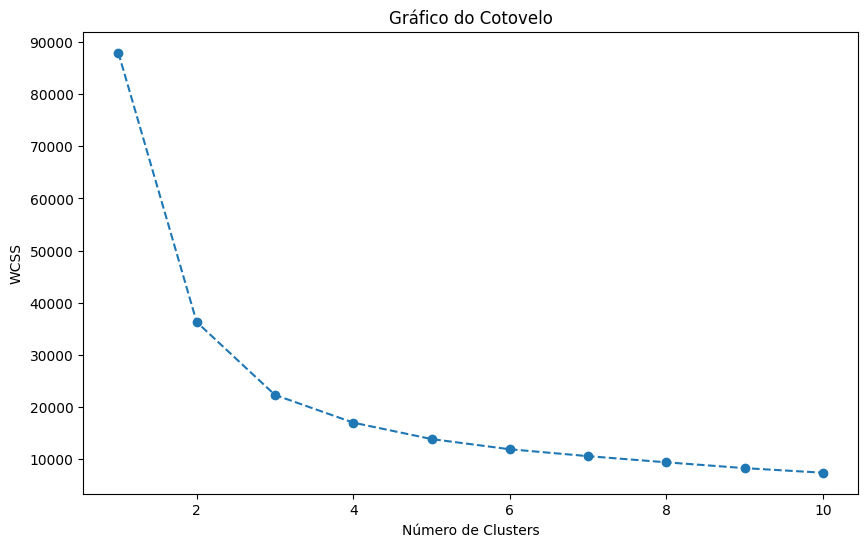

In [65]:
# Supondo que a função calcular_wcss e dados_candidato já estejam definidos
wcss_candidato = calcular_wcss(dados_candidato)

# Obtendo o tipo de wcss_candidato
print(type(wcss_candidato))

# Visualizando o gráfico do cotovelo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_candidato, marker='o', linestyle='--')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


In [66]:
type(wcss_candidato)

list

In [67]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_candidato)):
    print(f'o cluster {i} possui valor de wcss de: {wcss_candidato[i]}')

o cluster 0 possui valor de wcss de: 87967.30238735827
o cluster 1 possui valor de wcss de: 36303.65569855319
o cluster 2 possui valor de wcss de: 22317.25470759317
o cluster 3 possui valor de wcss de: 17003.014473958625
o cluster 4 possui valor de wcss de: 13852.344270465042
o cluster 5 possui valor de wcss de: 11891.535640134436
o cluster 6 possui valor de wcss de: 10569.342399112338
o cluster 7 possui valor de wcss de: 9388.294239979961
o cluster 8 possui valor de wcss de: 8271.414708055036
o cluster 9 possui valor de wcss de: 7390.721050773132


Aplicando Novamente o Gráfico do Cotovelo

In [68]:
import plotly.express as px #Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go #Criação e concatenização de gráficos

In [69]:
grafico_wcss = px.line( x=range(1,11),
                      y=wcss_candidato
                      )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o Wcss',
                  xaxis_title= 'Número de Clusters',
                  yaxis_title= 'Valor do Wcss',
                  template= 'plotly_white'
                  )

fig.show()

In [71]:
kmeans_candidatos = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
base_completa['cluster'] = kmeans_candidatos.fit_predict(dados_candidato)


In [72]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands),cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,18.290293,16.521825,1
18,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,17.023407,11.666234,1
40,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,26.343613,23.167255,2
65,4,140.0,167,Feminino,24,Santa Catarina,SC,Brasil,19.105834,20.877145,1
87,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,27.742516,23.166236,2
...,...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,35.452508,40.833760,0
478,544,129.0,157,Masculino,1,Acre,AC,Brasil,36.754079,33.290301,0
178,545,107.0,115,Masculino,6,Ceará,CE,Brasil,20.774142,26.858661,2
396,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,28.004697,37.302389,0


Calculando os Centroides de Cada Cluster

In [73]:
centroides_clusters = kmeans_candidatos.cluster_centers_
centroides_clusters

array([[36.11833488, 37.42830067],
       [15.85595428, 16.00544877],
       [26.05736697, 26.52422074]])

In [74]:
grafico = px.scatter(x = base_completa['exp(in months)'],
                     y = base_completa['salary(in thousands)'],
                     color= base_completa['cluster'])

grafico_centroide = px.scatter(x= centroides_clusters[:,0], y= centroides_clusters[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

Visualizando e Alterando o Layout do Gráfico

In [75]:
grafico = px.scatter(x = base_completa['exp(in months)'],
                     y = base_completa['salary(in thousands)'],
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title= 'Análise de Clusters',
                  xaxis_title= 'exp(in months)',
                  yaxis_title= 'salary(in thousands)'
                  )

fig.show()

Criando Funções para Gerar Gráficos

In [76]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico= px.scatter(x = x,
                     y = y,
                     color= base_completa['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title= 'Análise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,
                    )
  fig.show()

In [77]:
plotar_grafico(base_completa['exp(in months)'], base_completa['salary(in thousands)'], 'exp(in months)', 'salary(in thousands)')

In [78]:
plotar_grafico(base_completa['salary(in thousands)'], base_completa['exp(in months)'], 'salary(in thousands)', 'exp(in months)')

In [79]:
plotar_grafico(base_completa['genero'], base_completa['exp(in months)'], 'genero', 'exp(in months)')

Segmentando os clientes baseado na análise dos clusters

In [80]:
x = 'exp(in months)'
y = 'salary(in thousands)'
plotar_grafico(base_completa[x], base_completa[y], x,y)

In [81]:
cluster_clientes = base_completa

In [82]:
#Segmentando os clientes baseado na análise de clusters
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Salários Altos'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Salários Médios'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Salários Baixos'

In [83]:
cluster_clientes

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands),cluster,nome_cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,18.290293,16.521825,1,Salários Baixos
18,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,17.023407,11.666234,1,Salários Baixos
40,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,26.343613,23.167255,2,Salários Médios
65,4,140.0,167,Feminino,24,Santa Catarina,SC,Brasil,19.105834,20.877145,1,Salários Baixos
87,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,27.742516,23.166236,2,Salários Médios
...,...,...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,35.452508,40.833760,0,Salários Altos
478,544,129.0,157,Masculino,1,Acre,AC,Brasil,36.754079,33.290301,0,Salários Altos
178,545,107.0,115,Masculino,6,Ceará,CE,Brasil,20.774142,26.858661,2,Salários Médios
396,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,28.004697,37.302389,0,Salários Altos


Análise dos Clusters Criados

In [84]:
#Verificando os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['exp(in months)'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Salários Altos,151.0,36.118335,4.771636,26.408048,32.812106,35.575009,38.668878,49.463222
Salários Baixos,151.0,15.855954,5.044803,0.697594,12.782479,16.496927,19.558882,27.848845
Salários Médios,245.0,26.057367,4.317435,16.389792,23.252563,25.892027,28.809348,37.330680


In [85]:
#Verificando os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['salary(in thousands)'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Salários Altos,151.0,37.428301,4.931763,28.946382,33.311000,36.785573,40.215725,55.297016
Salários Baixos,151.0,16.005449,4.675664,-1.276342,13.301491,17.043750,19.036881,25.992450
Salários Médios,245.0,26.524221,3.844063,15.833870,24.060775,26.753085,29.330351,37.137573


In [86]:
#Verificando os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Salários Altos,151,27,Ceará,11
Salários Baixos,151,27,Minas Gerais,10
Salários Médios,245,27,Piauí,13


In [87]:
cluster_clientes.query('nome_cluster == "Salários Altos" & estado == "Ceará"')

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,exp(in months),salary(in thousands),cluster,nome_cluster
156,35,178.0,213,Feminino,6,Ceará,CE,Brasil,34.939740,33.343630,0,Salários Altos
164,214,100.0,110,Feminino,6,Ceará,CE,Brasil,33.613525,36.155962,0,Salários Altos
166,249,153.0,190,Feminino,6,Ceará,CE,Brasil,36.391553,31.159570,0,Salários Altos
168,294,183.0,212,Masculino,6,Ceará,CE,Brasil,36.738916,43.083552,0,Salários Altos
169,295,142.0,170,Feminino,6,Ceará,CE,Brasil,35.399687,32.850665,0,Salários Altos
170,309,118.0,133,Feminino,6,Ceará,CE,Brasil,36.586012,37.999267,0,Salários Altos
171,337,115.0,134,Feminino,6,Ceará,CE,Brasil,37.716050,40.680969,0,Salários Altos
172,392,184.0,225,Masculino,6,Ceará,CE,Brasil,32.555686,31.718700,0,Salários Altos
173,393,137.0,167,Feminino,6,Ceará,CE,Brasil,34.614424,38.743163,0,Salários Altos
175,500,171.0,205,Masculino,6,Ceará,CE,Brasil,37.050410,35.910728,0,Salários Altos


In [88]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['salary(in thousands)'].describe()

count       mean       std        min        25%  \
nome_cluster    genero                                                        
Salários Altos  Feminino    79.0  37.024201  4.908646  28.946382  32.921709   
                Masculino   72.0  37.871688  4.953151  29.977267  34.104376   
Salários Baixos Feminino    78.0  15.331567  4.763957  -1.276342  12.754820   
                Masculino   73.0  16.725487  4.500726   2.856367  14.452508   
Salários Médios Feminino   109.0  26.508486  3.880458  15.999828  24.134761   
                Masculino  136.0  26.536831  3.828970  15.833870  23.940483   

                                 50%        75%        max  
nome_cluster    genero                                      
Salários Altos  Feminino   36.316405  39.817419  52.859146  
                Masculino  37.206300  40.596145  55.297016  
Salários Baixos Feminino   15.931488  18.282205  25.992450  
                Masculino  17.939585  19.788112  24.214241  
Salários Médios Feminino   26.569897  29.378485  37.137573  
                Masculino  26.842447  29.314477  36.216998

In [89]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['exp(in months)'].describe()

count       mean       std        min        25%  \
nome_cluster    genero                                                        
Salários Altos  Feminino    79.0  36.153463  4.794336  27.261238  32.824593   
                Masculino   72.0  36.079791  4.779932  26.408048  32.751187   
Salários Baixos Feminino    78.0  15.420453  4.520106   3.196824  12.364723   
                Masculino   73.0  16.321285  5.544881   0.697594  13.659081   
Salários Médios Feminino   109.0  26.025508  4.232341  16.662708  23.293150   
                Masculino  136.0  26.082901  4.399872  16.389792  23.024379   

                                 50%        75%        max  
nome_cluster    genero                                      
Salários Altos  Feminino   35.466144  38.655259  49.463222  
                Masculino  36.226325  38.665167  49.045090  
Salários Baixos Feminino   15.378084  18.895369  25.743916  
                Masculino  17.060923  20.023587  27.848845  
Salários Médios Feminino   26.074160  28.771521  37.330680  
                Masculino  25.656996  28.825777  36.811673

In [90]:
cluster_clientes.to_csv('Classificação Candidatos.csv', sep = ';', encoding = 'latin1')